# Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
data = pd.read_csv("satisfaction.csv")
data

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Dining,Ambiance,Distance from Home,Table Comfort,Reservation Convenience,...,Entertainment Options,Online support,Ease of Online booking,Table Service,Space Between Tables,Baggage handling,Checkin service,Cleanliness,Online Menu Access,Wait Time for a Table
0,11112,satisfied,Female,Loyal Customer,65,Personal,Eco,265,0,0,...,4,2,3,3,0,3,5,3,2,0
1,110278,satisfied,Male,Loyal Customer,47,Personal,Business,2464,0,0,...,2,2,3,4,4,4,2,3,2,310
2,103199,satisfied,Female,Loyal Customer,15,Personal,Eco,2138,0,0,...,0,2,2,3,3,4,4,4,2,0
3,47462,satisfied,Female,Loyal Customer,60,Personal,Eco,623,0,0,...,4,3,1,1,0,1,4,1,3,0
4,120011,satisfied,Female,Loyal Customer,70,Personal,Eco,354,0,0,...,3,4,2,2,0,2,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,119211,satisfied,Female,disloyal Customer,29,Personal,Eco,1731,5,5,...,5,2,2,3,3,4,4,4,2,0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal,Business,2087,2,3,...,1,1,3,2,3,3,1,2,1,174
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal,Eco,2320,3,0,...,2,2,4,4,3,4,2,3,2,155
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal,Eco,2450,3,2,...,2,2,3,3,2,3,2,1,2,193


# Label Encoding

In [ ]:
df = data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
#perform label encoding across team, position, and all_star columns
df[['Gender', 'Customer Type', 'Type of Dining','Ambiance','satisfaction_v2']] = df[['Gender', 'Customer Type', 'Type of Dining','Ambiance','satisfaction_v2']].apply(le.fit_transform)


In [ ]:
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Dining,Ambiance,Distance from Home,Table Comfort,Reservation Convenience,...,Entertainment Options,Online support,Ease of Online booking,Table Service,Space Between Tables,Baggage handling,Checkin service,Cleanliness,Online Menu Access,Wait Time for a Table
0,11112,1,0,0,65,1,1,265,0,0,...,4,2,3,3,0,3,5,3,2,0
1,110278,1,1,0,47,1,0,2464,0,0,...,2,2,3,4,4,4,2,3,2,310
2,103199,1,0,0,15,1,1,2138,0,0,...,0,2,2,3,3,4,4,4,2,0
3,47462,1,0,0,60,1,1,623,0,0,...,4,3,1,1,0,1,4,1,3,0
4,120011,1,0,0,70,1,1,354,0,0,...,3,4,2,2,0,2,4,2,5,0


# Heat Map for feature selection

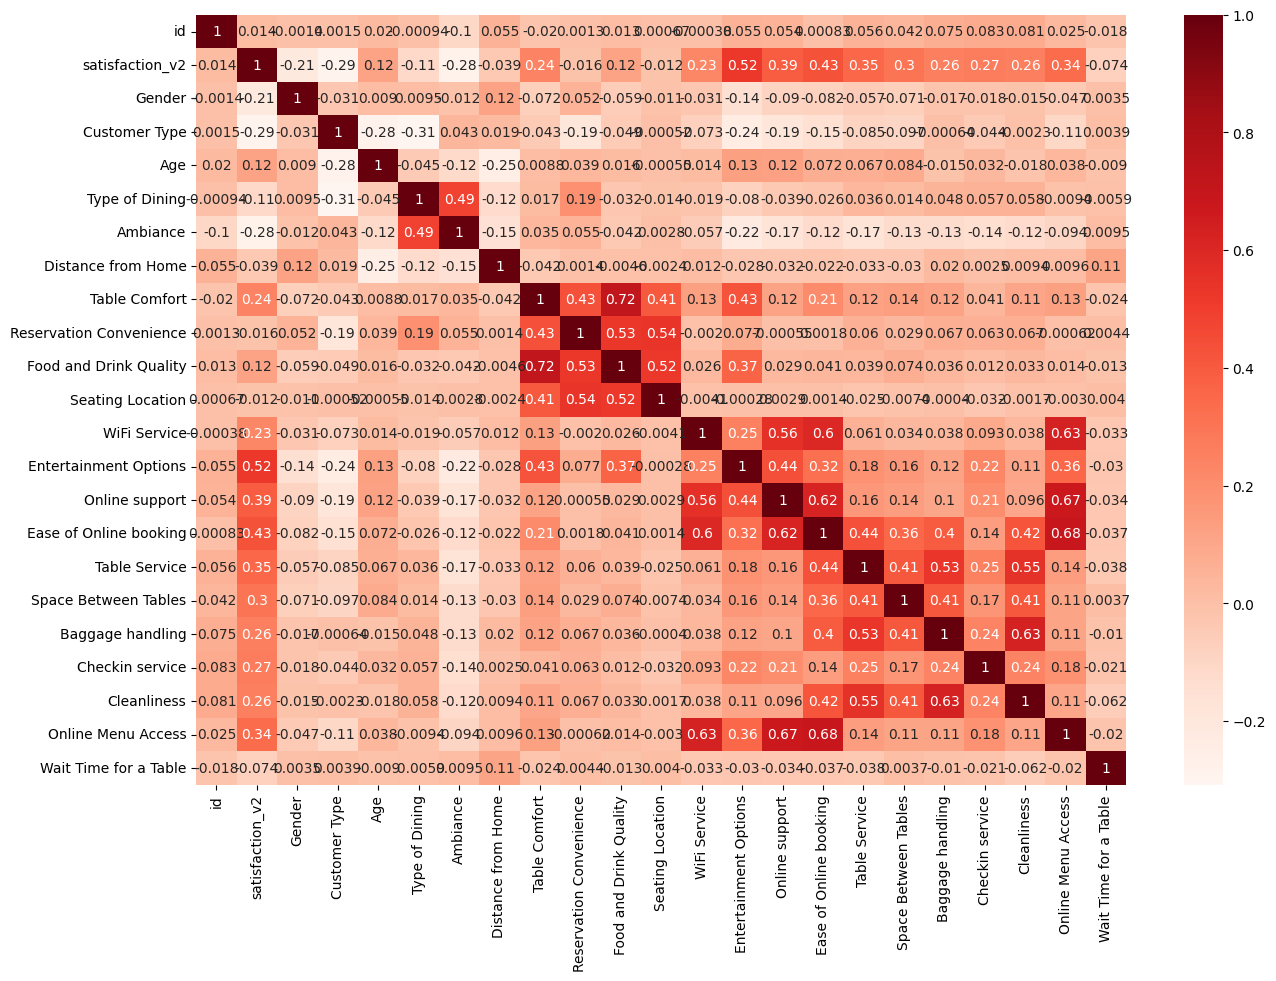

In [ ]:
plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = abs(cor["satisfaction_v2"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

satisfaction_v2           1.000000
Entertainment Options     0.523496
Online support            0.390143
Ease of Online booking    0.431772
Table Service             0.352047
Space Between Tables      0.304928
Online Menu Access        0.338147
Name: satisfaction_v2, dtype: float64

In [ ]:
df_selected = df[['Entertainment Options', 'Online Menu Access', 'Online support','Space Between Tables','Table Service','Ease of Online booking','satisfaction_v2']]

In [ ]:
y = df_selected["satisfaction_v2"]  # Target variable

In [ ]:
# Separate features and target variable
X = df_selected.drop(columns="satisfaction_v2")  # Features

# train and test split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (103904, 6)
train size y :  (103904,)
test size X :  (25976, 6)
test size y :  (25976,)


# model training

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression()



In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)



LogisticRegression()

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Model evaluation

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8006621496766245
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78     11675
           1       0.81      0.83      0.82     14301

    accuracy                           0.80     25976
   macro avg       0.80      0.80      0.80     25976
weighted avg       0.80      0.80      0.80     25976



#prediction

In [ ]:
X_test.head()

,Entertainment Options,Online Menu Access,Online support,Space Between Tables,Table Service,Ease of Online booking
103044,4,3,4,4,4,4
43282,1,4,5,4,3,4
65543,5,3,4,4,4,4
65083,4,3,5,3,3,3
76496,2,2,2,4,4,2


In [ ]:
# Make prediction with a single test instance
test_instance = pd.DataFrame({
    'Entertainment Options': [4],
    'Online Menu Access': [3],
    'Online support': [4],
    'Space Between Tables': [4],
    'Table Service': [4],
    'Ease of Online booking': [4]
})

single_prediction = model.predict(test_instance)

**1 for satisfied , 0 for neutral or dissatisfied**

In [ ]:
print(f"Predicted Class: {single_prediction[0]}")

Predicted Class: 1
